In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
from PIL import Image
import io

In [3]:
# Upload an image
uploaded = files.upload()

Saving 1330235.png to 1330235.png
Saving backiee-298724-landscape.jpg to backiee-298724-landscape.jpg


In [4]:
# Load the image using PIL
image_path = next(iter(uploaded))
img = Image.open(io.BytesIO(uploaded[image_path])).convert('RGB')
img = np.array(img)


In [5]:
# Reshape image for KMeans
reshaped_img = img.reshape((-1, 3))


In [6]:
# Run KMeans to find top 5 colors
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(reshaped_img)
colors = np.round(kmeans.cluster_centers_).astype(int)


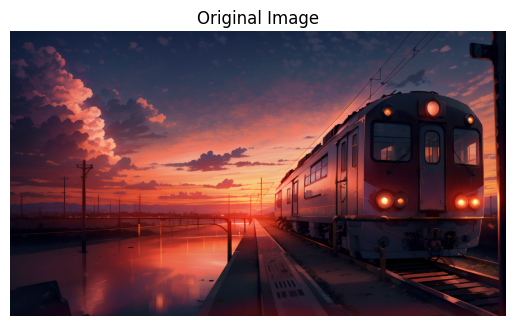

In [7]:
# Plot original image
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()

In [8]:
# Plot color palette
palette = np.zeros((50, 300, 3), dtype='uint8')
steps = 300 // k
for i, color in enumerate(colors):
    palette[:, i*steps:(i+1)*steps] = color


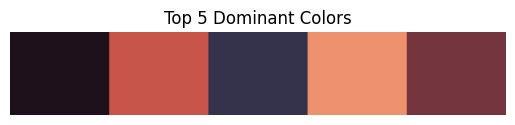

In [9]:
plt.imshow(palette)
plt.axis('off')
plt.title("Top 5 Dominant Colors")
plt.show()


In [10]:
# Optional: Print the RGB values
print("Dominant Colors (RGB):")
print(colors)


Dominant Colors (RGB):
[[ 30  17  28]
 [199  85  73]
 [ 53  51  75]
 [237 145 110]
 [117  53  62]]
